In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('winequality-red.csv')

In [ ]:
data.shape

(1599, 12)

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data['quality'].nunique()

6

In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

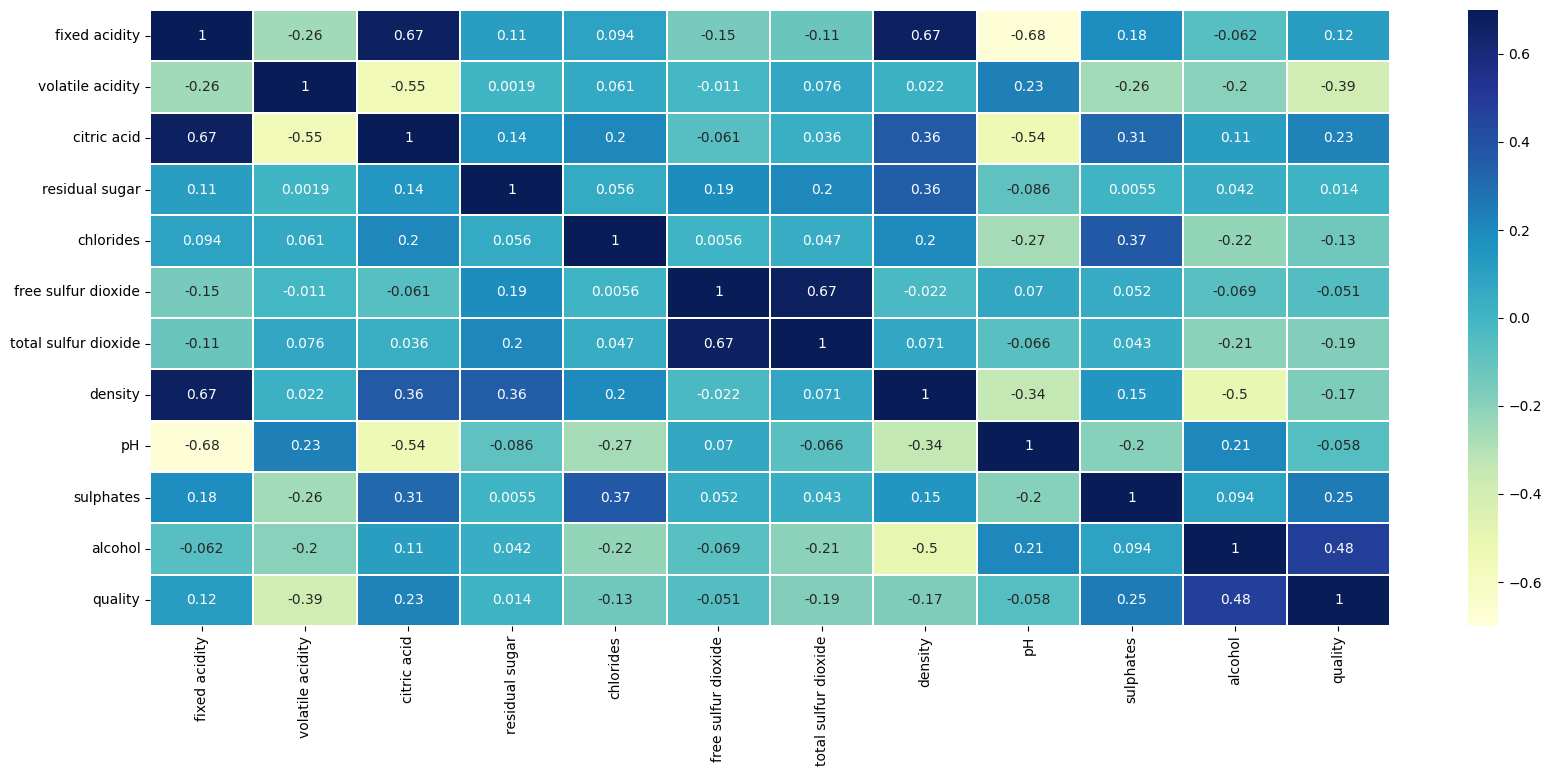

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.7, vmax=0.7, annot=True, linewidths=0.2, cmap='YlGnBu')

In [ ]:
data1 = data.drop(['fixed acidity','free sulfur dioxide'],axis=1)

In [ ]:
x = data1.drop('quality',axis=1)
y = data1['quality']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.25)

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [ ]:
model = lr.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([5.36476106, 5.07724153, 5.60233895, 5.38956035, 5.73191099,
       5.21346572, 5.09656468, 5.14003181, 5.75933498, 5.6986371 ,
       6.15937187, 5.26317039, 5.54596461, 5.21050926, 5.41748061,
       6.50174427, 5.20046185, 5.59001579, 6.59348558, 5.31377191,
       5.45074661, 5.18978852, 5.98916247, 6.4246734 , 5.36553688,
       5.43180852, 6.39175721, 5.39490441, 5.16363906, 6.17084425,
       5.28416565, 5.59992563, 5.78536127, 5.38271901, 5.45654468,
       5.06971172, 6.19266443, 5.72606863, 5.62070906, 6.21634809,
       5.49223825, 5.29547643, 6.19522628, 5.2258385 , 5.85581135,
       5.82259048, 6.42821246, 5.57032865, 5.17058266, 5.58847503,
       5.15086591, 5.10330714, 5.61551259, 6.45286228, 5.02274437,
       5.06641176, 6.01854189, 5.49451934, 5.84742645, 5.26591827,
       5.63815467, 5.98002084, 5.2822497 , 5.35149173, 6.4337373 ,
       5.37567746, 6.36285816, 5.30626115, 6.49286173, 5.28976107,
       6.45563565, 4.77030212, 5.80677356, 5.84802693, 6.19785

In [ ]:
from sklearn.metrics import mean_squared_error
print ('MSE is: \n', mean_squared_error(y_test, predictions))

MSE is: 
 0.3891243079074742


# Classification

In [ ]:
#Logistic Regression

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data['Purchased'].unique()

array([0, 1])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data = pd.get_dummies(data,dtype='int64')

In [ ]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
User ID,1.000000,-0.000721,0.071097,0.007120,0.025249,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,0.073741,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,0.060435,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,0.042469,-0.042469
Gender_Female,0.025249,0.073741,0.060435,0.042469,1.000000,-1.000000
Gender_Male,-0.025249,-0.073741,-0.060435,-0.042469,-1.000000,1.000000


In [ ]:
x = data.drop(['Purchased','User ID'],axis=1)
y = data['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()

In [ ]:
logit_model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logit_model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
y_test

,Purchased
209,0
280,1
33,0
210,1
93,0
...,...
246,0
227,1
369,1
176,0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.8875
Precision is 0.9130434782608695
Recall is 0.75
f1 score is 0.8235294117647058


In [ ]:
p=logit_model.predict([[56,23000,0,1]])
if p[0]:
  print("Not purchase")
else:
  print("purchase")

Not purchase


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#K Nearest Neighbor(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  k_model = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  k_model.fit(X_train,y_train)
  y_pred = k_model.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)


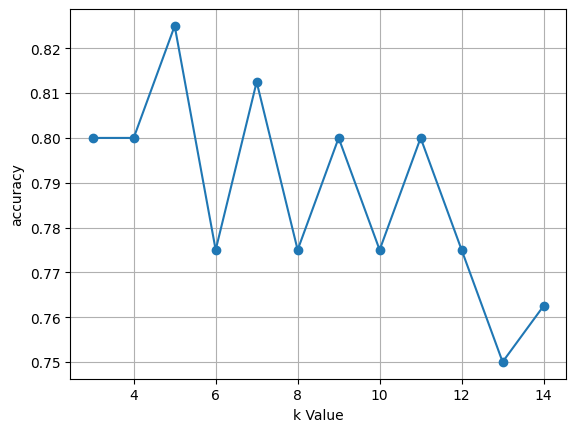

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
k_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
k_model.fit(X_train,y_train)
y_pred = k_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)

In [ ]:
print(acc)

0.825


In [ ]:
#SVM model
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.8375


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.85


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)


0.9
